In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [5]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [7]:
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice
mouse_count = len(combined_data["Mouse ID"].unique())
mouse_count

249

In [9]:
# check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID
dup_mouse_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

clean_combined_data = combined_data[combined_data['Mouse ID'].isin(dup_mouse_id)==False]

In [10]:
# Checking the number of mice in the clean DataFrame = 1880 rows - check
clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

#clean_combined_data.groupby("Drug Regimen")

summary_table = clean_combined_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mean = ('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Median = ('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Variance = ('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
       Std_Dev = ('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
       SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)
summary_table

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [12]:
clean_combined_data.groupby("Drug Regimen")

mouse_df = reg_group.loc[:,["Mouse ID"]]
mouse_df = reg_group.drop_duplicates()

#gender_total = user_df["Gender"].value_counts()
#gender_percent = gender_total/player_count * 100
#gender_frame = pd.DataFrame({"Percentage of Players": gender_percent, "Total Count": gender_total})

#pd.options.display.float_format = "{:,.2f}%".format
#gender_frame

NameError: name 'reg_group' is not defined

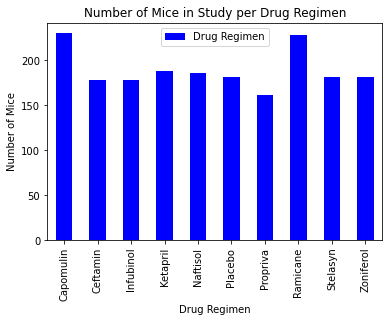

In [13]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  the number of total mice for each treatment regimen throughout the course of the study.

 # * **NOTE:** These plots should look identical.

reg_group = combined_data.groupby('Drug Regimen')

reg_group_count = pd.DataFrame(reg_group['Drug Regimen'].count())

count_chart = reg_group_count.plot(kind='bar', title="Number of Mice in Study per Drug Regimen", color="blue")

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")
#plt.tight_layout()
# Save the figure
#plt.savefig("figures/PandaBarChart.png")

plt.show()


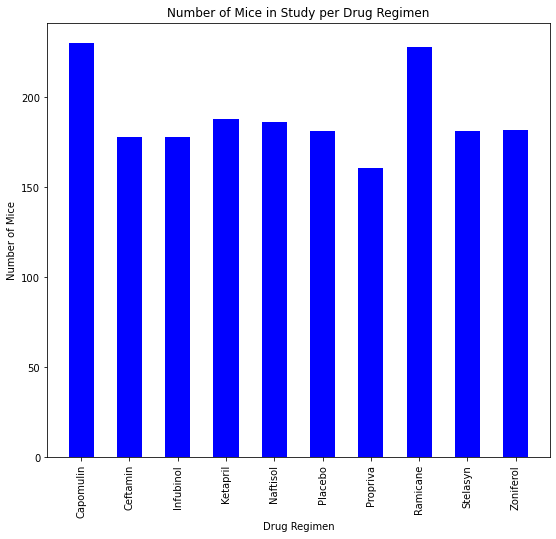

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(reg_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, reg_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(reg_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(reg_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Number of Mice in Study per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#column_name = ["Drug Regimen"]
#plt.legend(column_name,loc="best")

# Save the figure
#plt.savefig("figures/PyplotBarChart.png")
plt.show()

In [24]:
clean_combined_data.groupby
gender_group = clean_combined_data.groupby('Sex').count()["Mouse ID"]
gender_group

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

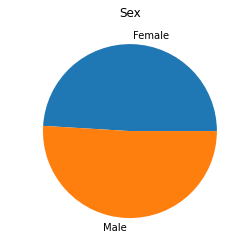

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

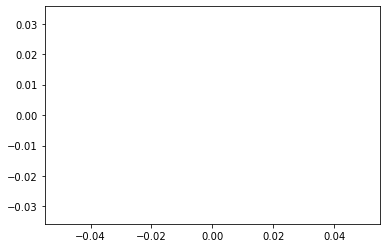

In [32]:
#PANDAS

gender_pie = gender_group.plot(kind="pie", y=gender_group, title=("Sex"))

gender_pie.set_ylabel(" ")
plt.show()
plt.tight_layout()
plt.axis("equal")



In [40]:
# MATPLOTLIB
#* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

#  * **NOTE:** These plots should look identical.
        

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
#sizes = [gen]

# The colors of each section of the pie chart
colors = ["orange", "lightblue"]

# Tells matplotlib to separate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)
        

([<matplotlib.patches.Wedge at 0x13926f47588>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Male'),
  Text(0.7320888280116863, 0.8210030133321533, 'Female')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.3993211789154652, 0.4478198254539018, '51.0%')])

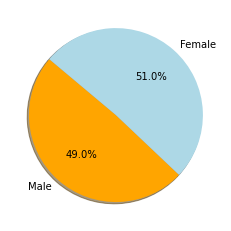

In [41]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart


plt.pie(gender_group, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)




In [35]:
* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

SyntaxError: invalid syntax (<ipython-input-35-d6e2f6bb627d>, line 1)

In [ ]:
* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.